In [1]:
######################################     Modules     #######################################
# MODULES
import sys
from time import process_time
import pickle
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact

sys.path.append('../.')
import verbose_module
sys.path.append('../../../.')
import pIRPgym

path = '/Users/juanbeta/My Drive/Research/Supply Chain Analytics/pIRPgym/'
experiments_path = '/Users/juanbeta/My Drive/Research/Supply Chain Analytics/Experiments/Flower Agent/'

sizes = [5,10,15,20,30,50]
num_episodes = 2000

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-11


# Instance Visualization

### Supplier Availability

In [16]:
def plot_distributions(size,indicator,episode):
    with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
        data = pickle.load(file)
    inst_gen = data[2]
    if indicator=='Availability':
        pIRPgym.Visualizations.RoutingV.plot_supplier_distributions(inst_gen.q_parameters,save_fig=True)
    else:
        pIRPgym.Visualizations.RoutingV.plot_supplier_distributions(inst_gen.p_parameters)

interact(plot_distributions,
         size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30],value=10,description='Episodes:'),
         indicator=widgets.Dropdown(options=['Availability','Prices'],value='Availability',description='Indicator:'))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, 50), value=10),…

<function __main__.plot_distributions(size, indicator, episode)>

### Supplier Locations

In [17]:
def plot_locations(size,episode):
    with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
        data = pickle.load(file)
    inst_gen = data[2]
    pIRPgym.Visualizations.RoutingV.render_routes(inst_gen,[],save_fig=True)

interact(plot_locations,
         size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30],value=10,description='Episodes:'))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, 50), value=10),…

<function __main__.plot_locations(size, episode)>

# Training

In [3]:
def print_training_summary(size,episode):
    Num_Episodes = [10,30,50]
    Num_Suppliers = {10:[10,20,30,40,50],
                  30:[5,10,15,20,30],
                  50:[20,30]}
    
    CG_aa = 0
    GA_aa = 0
    both_aa = 0
    total_aa = 0
    
    for episode in Num_Episodes:
        for size in Num_Suppliers[episode]:
            with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
                _,_,inst_gen,FlowerAgent = pickle.load(file)
            
            for i,gens in enumerate(FlowerAgent.generator):
                total_aa+=1
                if 'CG' in gens:    CG_aa+=1
                if 'GA' in gens:    GA_aa+=1
                if 'CG' in gens and 'GA' in gens:   both_aa+=1

    print(f'---------- Training Summary ----------\n')
    # print(f'Training time: {None}')
    print(f'Number of routes: {FlowerAgent.routes_num}')
    # print(f'Training time: {None}')
    print('\nProportion of generated routes in selected experiment')
    CG_gen,GA_gen,total = pIRPgym.Visualizations.RoutingV.count_generated(FlowerAgent.generator)
    print(f'- Column Generation: {round(100*CG_gen/len(FlowerAgent.routes),2)}%')
    print(f'- Genetic Algorithm: {round(100*GA_gen/len(FlowerAgent.routes),2)}%')
    print(f'- Both: {round(100*total/len(FlowerAgent.routes),2)}%')
    
    print('\nOverall proportion of generated routes')
    CG_gen,GA_gen,total = pIRPgym.Visualizations.RoutingV.count_generated(FlowerAgent.generator)
    print(f'- Column Generation: {round(100*CG_aa/total_aa,2)}%')
    print(f'- Genetic Algorithm: {round(100*GA_aa/total_aa,2)}%')
    print(f'- Both: {round(100*both_aa/total_aa,2)}%')
    

interact(print_training_summary,size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30,50],value=30,description='Episodes:'))
         

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, 50), value=10),…

<function __main__.print_training_summary(size, episode)>

### N Table

In [2]:
def plot_n_table(size,episode,suppliers):
    with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
        _,_,inst_gen,FlowerAgent = pickle.load(file)
    pIRPgym.Visualizations.RoutingV.n_plot(FlowerAgent.n_table,FlowerAgent.bincod,suppliers)

interact(plot_n_table,size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30,50],value=30,description='Episodes:'),
         suppliers=widgets.SelectMultiple(options=['All']+[i for i in range(1,11)],value=[7,8,9],rows=11,description='Suppliers',disabled=False))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, 50), value=10),…

<function __main__.plot_n_table(size, episode, suppliers)>

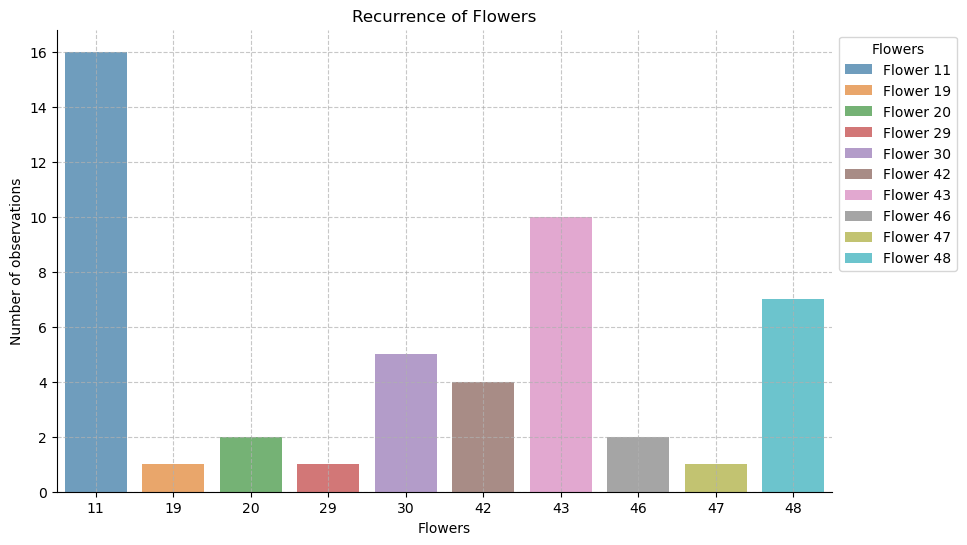

In [3]:
plot_n_table(10,30,[7,8,9])

### Key Performance Indicators

In [2]:
def plot_flower_indicators(size,episode,indicator1,indicator2,suppliers):
    with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
        _,_,_,FlowerAgent = pickle.load(file)
    pIRPgym.Visualizations.RoutingV.plot_indicators(FlowerAgent.metrics,FlowerAgent.bincod,indicator1,indicator2,suppliers)

interact(plot_flower_indicators,
         size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30,50],value=30,description='Episodes:'),
         indicator1=widgets.Dropdown(options=['Fixed Service Level','Dynamic Service Level','Cost per Supplier','Price Delta'],value='Fixed Service Level',description='x-metric:'),
         indicator2=widgets.Dropdown(options=['Fixed Service Level','Dynamic Service Level','Cost per Supplier','Price Delta'],value='Dynamic Service Level',description='y-metric:'),
         suppliers=widgets.SelectMultiple(options=['All']+[i for i in range(1,11)],value=[7,8,9],rows=11,description='Suppliers',disabled=False))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, 50), value=10),…

<function __main__.plot_flower_indicators(size, episode, indicator1, indicator2, suppliers)>

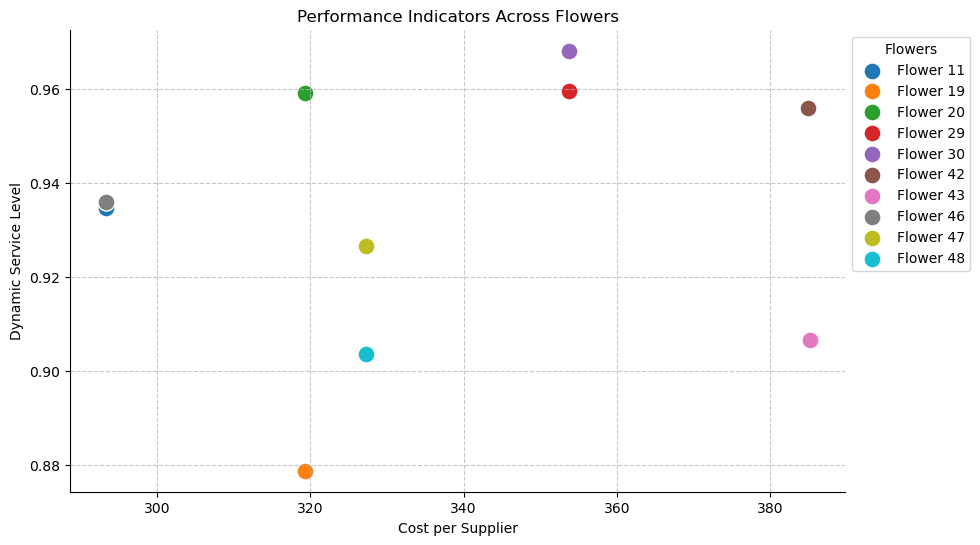

In [3]:
plot_flower_indicators(10,30,'Cost per Supplier','Dynamic Service Level',[7,8,9])

### Visualize routes

In [7]:
def render_routes(size,solution,episode):
    with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
        _,_,inst_gen,FlowerAgent = pickle.load(file)
    pIRPgym.Visualizations.RoutingV.render_routes(inst_gen,FlowerAgent.routes[solution])

interact(render_routes,
         size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30,50],value=30,description='Episodes:'),
         solution=widgets.Dropdown(options=range(1,51),value=1,description='Routes:'))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, 50), value=10),…

<function __main__.render_routes(size, solution, episode)>

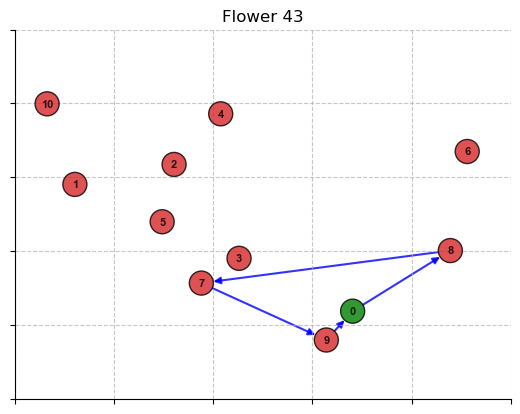

385.20589278675874


In [6]:
with open(experiments_path+f'Training/M10-E30.pkl', 'rb') as file:
    _,_,inst_gen,FlowerAgent = pickle.load(file)
pIRPgym.Visualizations.RoutingV.render_routes(inst_gen,FlowerAgent.routes[43])
print(FlowerAgent.metrics[43][1])

# Flower Analysis and Comparison

### Key Performance Indicators

In [11]:
def plot_flowers_comparison(size,episode,indicator1,indicator2,flower1,flower2):
    with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
        _,_,_,FlowerAgent = pickle.load(file)
    print('\n')
    pIRPgym.Visualizations.RoutingV.plot_flower_comparison(FlowerAgent.history,indicator1,indicator2,flower1,flower2)
    print('\n')

interact(plot_flowers_comparison,
         size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30,50],value=30,description='Episodes:'),
         indicator1=widgets.Dropdown(options=['Fixed Service Level','Dynamic Service Level','Price Delta'],value='Fixed Service Level',description='x-metric:'),
         indicator2=widgets.Dropdown(options=['Fixed Service Level','Dynamic Service Level','Price Delta'],value='Dynamic Service Level',description='y-metric:'),
         flower1=widgets.Dropdown(options=[i for i in range(1,51)],value=1,description='Flower 1:'),
         flower2=widgets.Dropdown(options=[i for i in range(1,51)],value=2,description='Flower 2:'))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, 50), value=10),…

<function __main__.plot_flowers_comparison(size, episode, indicator1, indicator2, flower1, flower2)>

# Testing

### Overall performance

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(performance_data,indicator):
    """
    Plot boxplots for different policies.

    Parameters:
    - performance_data (dict): Dictionary containing policies as keys and lists of values as values.
    """
    # Set up figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Define a color palette for better visibility
    colors = ['purple','red','orange','blue','green','brown','cian']
    vals = {'Two Phases':'TwPh','Service Level':'SL','Reactive Service Level':'RSL','Average Service Level':'ASL',
            'Cost':'C','Unitary Cost':'UC'}
    # Plot boxplots for each policy

    for i, (policy, values) in enumerate(performance_data.items()):
        sns.boxplot(x=[vals[policy]]*len(values), y=values, color=colors[i % len(colors)], ax=ax)

    # Set labels and title
    ax.set_xlabel('Policies', fontsize=12)
    ax.set_ylabel('Performance', fontsize=12)
    ax.set_title('Performance Comparison Across Policies', fontsize=14)

    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.5)

    # Show the plot
    plt.show()


In [14]:
def plot_performance_boxplots(size,episode,indicator):
    if indicator == 'Transport Cost':pos2=0
    elif indicator == 'Cost per Supplier':pos2=1
    elif indicator == 'Service Level':pos2=0
    elif indicator == 'Reactive Service Level':pos2=1

    with open(experiments_path+f'Testing/M{size}-E{episode}.pkl', 'rb') as file:
        results = pickle.load(file)

    info,TP_results,SL_results,RSL_results,ASL_results,C_results,UC_results,seeds = results.values()

    data = {'Two Phases':list(),'Service Level':list(),'Reactive Service Level':list(),'Average Service Level':list(),
            'Cost':list(),'Unitary Cost':list()}
    
    for episode in range(info[1]):
        if indicator in ['Transport Cost','Cost per Supplier']:
            data['Two Phases'].append(TP_results[episode][0][2][pos2])
            data['Service Level'].append(SL_results[episode][0][2][pos2])
            data['Reactive Service Level'].append(RSL_results[episode][0][2][pos2])
            data['Average Service Level'].append(ASL_results[episode][0][2][pos2])
            data['Cost'].append(C_results[episode][0][2][pos2])
            data['Unitary Cost'].append(UC_results[episode][0][2][pos2])
        elif indicator in ['Service Level','Reactive Service Level','Average Service Level']:
            data['Two Phases'].append(TP_results[episode][2][pos2])
            data['Service Level'].append(SL_results[episode][2][pos2])
            data['Reactive Service Level'].append(RSL_results[episode][2][pos2])
            data['Average Service Level'].append(ASL_results[episode][2][pos2])
            data['Cost'].append(C_results[episode][2][pos2])
            data['Unitary Cost'].append(UC_results[episode][2][pos2])
        else:
            data['Two Phases'].append(TP_results[episode][1][1])
            data['Service Level'].append(SL_results[episode][1][1])
            data['Reactive Service Level'].append(RSL_results[episode][1][1])
            data['Average Service Level'].append(ASL_results[episode][1][1])
            data['Cost'].append(C_results[episode][1][1])
            data['Unitary Cost'].append(UC_results[episode][1][1])

    plot_boxplots(data,indicator)
    # pIRPgym.Visualizations.RoutingV.n_plot(FlowerAgent.n_table,FlowerAgent.bincod,indicator)

interact(plot_performance_boxplots,size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30,50],value=10,description='Episodes:'),
         indicator=widgets.Dropdown(options=['Transport Cost','Cost per Supplier','Service Level',
                                             'Reactive Service Level','Purchase Cost'],
                                    value='Transport Cost',description='Indicator:'))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, 50), value=10),…

<function __main__.plot_performance_boxplots(size, episode, indicator)>

/var/folders/m6/89fwm0dn5mjbdz4tkj6586bm0000gn/T/ipykernel_39559/604767069.py:27: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  centre_circle = plt.Circle((0, 0), 0.6, color='white', edgecolor='black', linewidth=0.2)


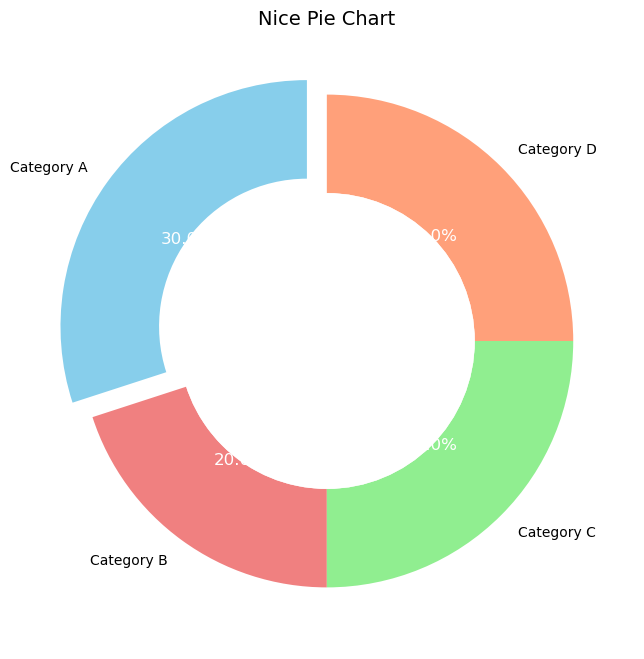

In [11]:
import matplotlib.pyplot as plt

def plot_nice_pie(labels, sizes, colors=None, explode=None):
    """
    Plot a nice pie chart.

    Parameters:
    - labels (list): List of labels for each wedge.
    - sizes (list): List of sizes for each wedge.
    - colors (list, optional): List of colors for each wedge. Default is None.
    - explode (list, optional): List of explode values for each wedge. Default is None.
    """
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))

    # Define a default color palette
    default_colors = plt.get_cmap('tab10').colors

    # Use specified colors or default to tab10
    wedge_colors = colors if colors else default_colors

    # Plot the pie chart
    _, _, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
                             colors=wedge_colors, explode=explode, wedgeprops=dict(width=0.4))

    # Add white circle in the center for a donut chart effect
    centre_circle = plt.Circle((0, 0), 0.6, color='white', edgecolor='black', linewidth=0.2)
    ax.add_artist(centre_circle)

    # Adjust the properties of text in each wedge
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_size(12)

    # Set title
    ax.set_title('Nice Pie Chart', fontsize=14)

    # Show the plot
    plt.show()

# Example usage:
labels = ['Category A', 'Category B', 'Category C', 'Category D']
sizes = [30, 20, 25, 25]
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon']

plot_nice_pie(labels, sizes, colors, explode=(0.1, 0, 0, 0))


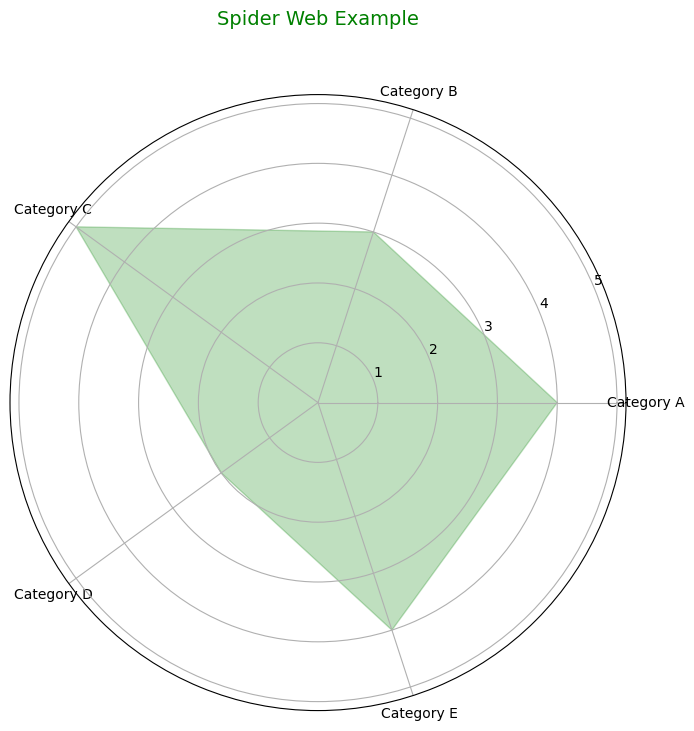

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_spider_web(labels, values, title='Spider Web Plot', color='b'):
    """
    Plot a spider web plot.

    Parameters:
    - labels (list): List of labels for each spoke.
    - values (list): List of values for each spoke.
    - title (str, optional): Title of the plot. Default is 'Spider Web Plot'.
    - color (str, optional): Color of the plot. Default is 'b' (blue).
    """
    # Number of spokes
    num_spokes = len(labels)

    # Calculate angle for each spoke
    angles = np.linspace(0, 2 * np.pi, num_spokes, endpoint=False).tolist()

    # Plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.set_xticks(angles)
    ax.set_xticklabels(labels)
    ax.set_title(title, size=14, color=color, y=1.1)

    plt.show()

# Example usage:
labels = ['Category A', 'Category B', 'Category C', 'Category D', 'Category E']
values = [4, 3, 5, 2, 4]
color = 'green'

plot_spider_web(labels, values, title='Spider Web Example', color=color)


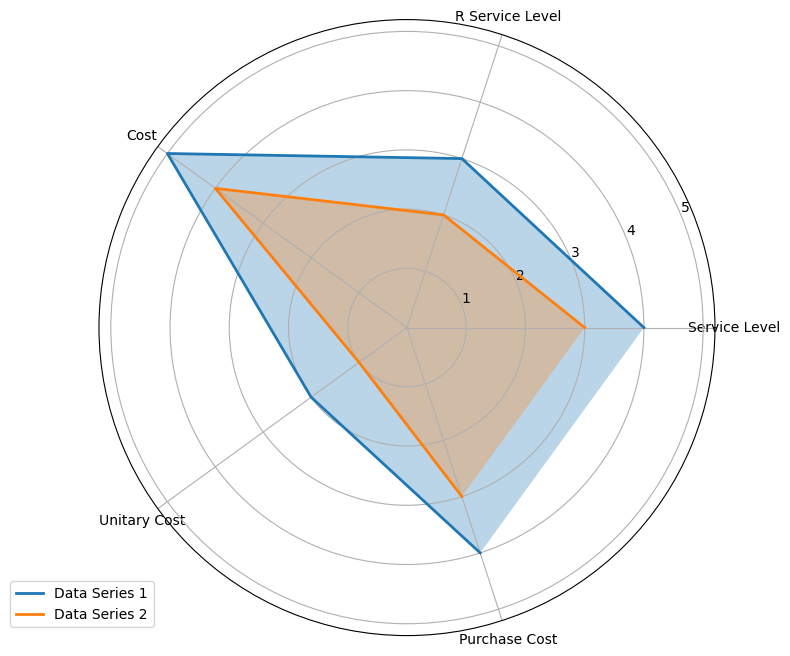

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def radar_chart(data_series1, data_series2, categories, title=''):
    """
    Plot a radar chart with two data series.

    Parameters:
    - data_series1 (list): Values for the first data series.
    - data_series2 (list): Values for the second data series.
    - categories (list): Categories for the radar chart.
    - title (str): Title of the radar chart.

    Returns:
    None
    """
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
    # data_series1 = np.concatenate((data_series1, [data_series1[0]]))
    # data_series2 = np.concatenate((data_series2, [data_series2[0]]))

    ax.plot(angles, data_series1, label='Data Series 1', linestyle='solid', linewidth=2)
    ax.fill(angles, data_series1, alpha=0.3)

    ax.plot(angles, data_series2, label='Data Series 2', linestyle='solid', linewidth=2)
    ax.fill(angles, data_series2, alpha=0.3)

    ax.set_thetagrids(angles * 180 / np.pi, categories)
    ax.set_title(title, size=20, y=1.1)

    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.show()

# Example usage:
data_series1 = [4, 3, 5, 2, 4]
data_series2 = [3, 2, 4, 1, 3]
categories = ['Service Level', 'R Service Level', 'Cost', 'Unitary Cost', 'Purchase Cost']

radar_chart(data_series1, data_series2, categories, title='')
